# EDA

## I. Clean data

### Import libraries 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape


(918, 12)

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Check value 0 because it could be missing value

In [9]:
# Chỉ xét các cột số
numeric_cols = ["Age","RestingBP", "Cholesterol", "MaxHR"]

# Đếm số lượng giá trị 0 trong mỗi cột
zero_counts = (df[numeric_cols] == 0).sum()

print("Number of 0 values ​​in each column:")
print(zero_counts)


Number of 0 values ​​in each column:
Age              0
RestingBP        1
Cholesterol    172
MaxHR            0
dtype: int64


#### have a lots of 0 values in Cholesterol 

In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Đọc file
df = pd.read_csv("heart.csv")

# --- Xử lý RestingBP ---
# Nếu RestingBP = 0 thì thay bằng median (tính trên các giá trị > 0)
median_bp = df.loc[df["RestingBP"] > 0, "RestingBP"].median()
df["RestingBP"] = df["RestingBP"].replace(0, median_bp)

print(f"Fill RestingBP=0 as median = {median_bp}")

# --- Xử lý Cholesterol ---
# Cholesterol = 0 coi như missing
df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)

# Encode các biến phân loại
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Áp dụng KNN Imputer (chỉ còn Cholesterol là missing)
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Làm tròn lại những cột nguyên
df_imputed["Age"] = df_imputed["Age"].round().astype(int)
df_imputed["RestingBP"] = df_imputed["RestingBP"].round().astype(int)
df_imputed["MaxHR"] = df_imputed["MaxHR"].round().astype(int)
df_imputed["FastingBS"] = df_imputed["FastingBS"].round().astype(int)
df_imputed["HeartDisease"] = df_imputed["HeartDisease"].round().astype(int)

# Xuất ra file CSV mới
df_imputed.to_csv("heart_final.csv", index=False)

print("✅ Dataset: heart_final.csv")


Fill RestingBP=0 as median = 130.0
✅ Dataset: heart_final.csv


### Check again


In [11]:
df = pd.read_csv("heart_final.csv")
# Chỉ xét các cột số
numeric_cols = ["Age","RestingBP", "Cholesterol", "MaxHR"]

# Đếm số lượng giá trị 0 trong mỗi cột
zero_counts = (df[numeric_cols] == 0).sum()

print("Number of 0 values ​​in each column:")
print(zero_counts)


Number of 0 values ​​in each column:
Age            0
RestingBP      0
Cholesterol    0
MaxHR          0
dtype: int64


## Ve bieu do

### em tim hieu xem nen ve bieu do nao hop ly roi ve nhe

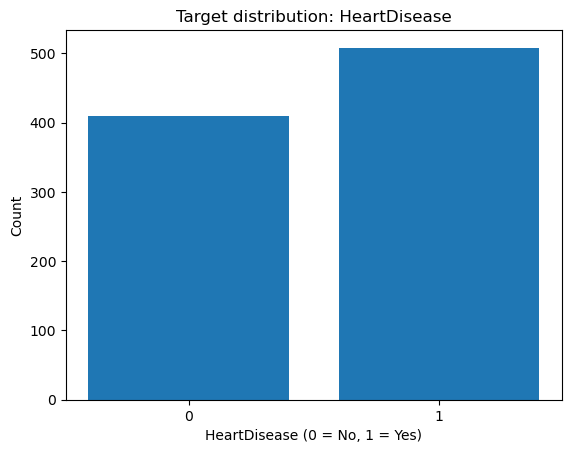

In [12]:
# NOTE: Biểu đồ cột phân phối nhãn HeartDisease
plt.figure()
counts = df["HeartDisease"].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Target distribution: HeartDisease")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


Biểu đồ cột cho thấy tần suất hai nhóm (0 = không bệnh, 1 = bệnh).

Dữ liệu khá cân bằng (~55% có bệnh, ~45% không), thuận lợi cho huấn luyện mô hình.

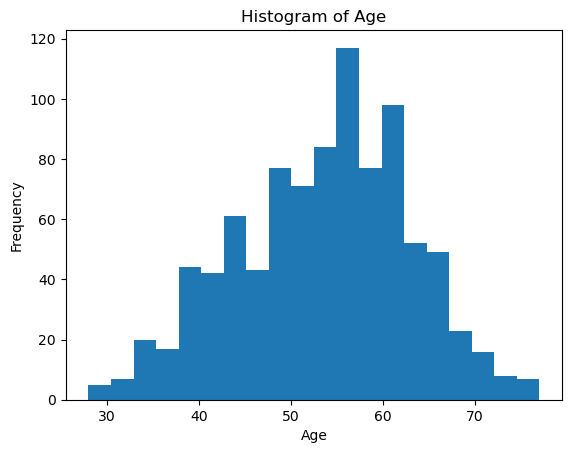

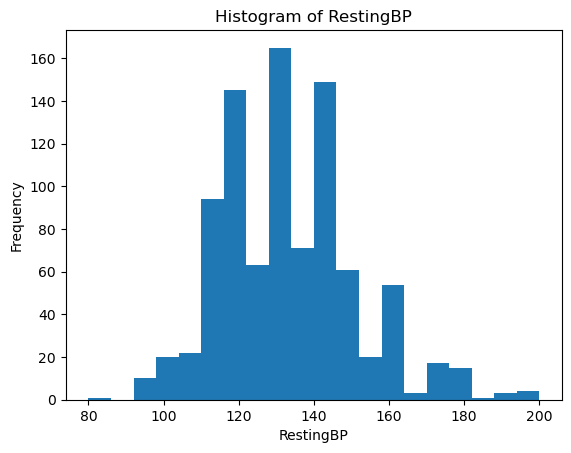

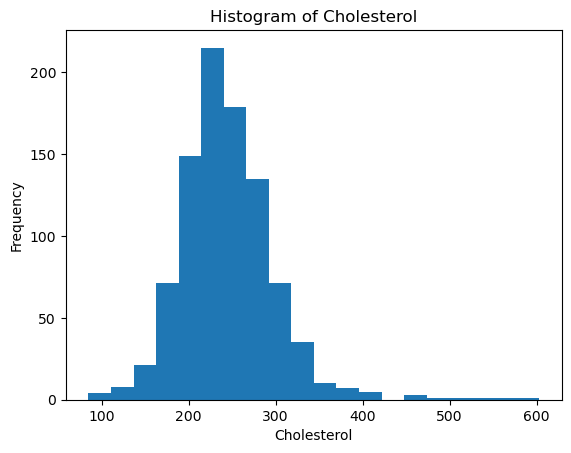

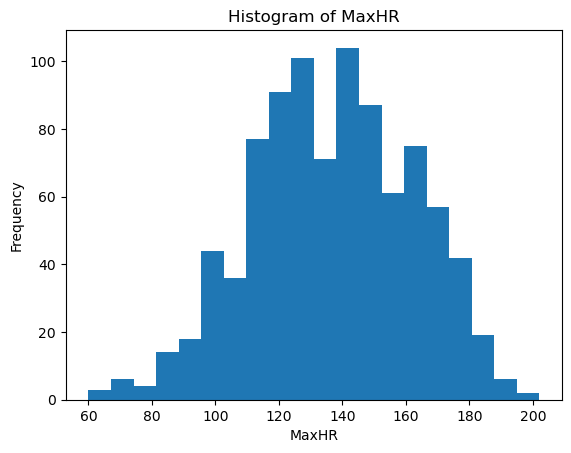

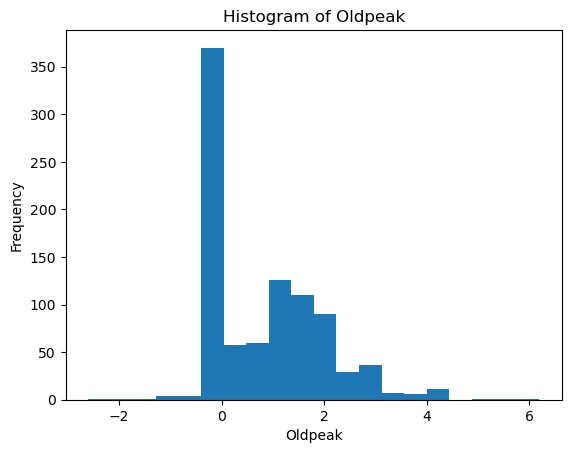

In [13]:
# NOTE: Histogram các biến numeric chính
numeric_cols = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
for col in numeric_cols:
    if col in df.columns:
        plt.figure()
        plt.hist(df[col].dropna(), bins=20)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


Age: phân phối gần chuẩn, tập trung 45–60 tuổi.

RestingBP: đa số 120–140 mmHg, một số giá trị bất thường (0, rất thấp, rất cao).

Cholesterol: tập trung 150–250, có giá trị 0 → cần xử lý.

MaxHR: trải từ 60–200, bệnh nhân có bệnh thường thấp hơn.

Oldpeak: đa số gần 0, có outlier đến 6 → chỉ số cao liên quan nguy cơ bệnh.

C:\Users\phamd\AppData\Local\Temp\ipykernel_17284\858856629.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["0","1"], showfliers=True)


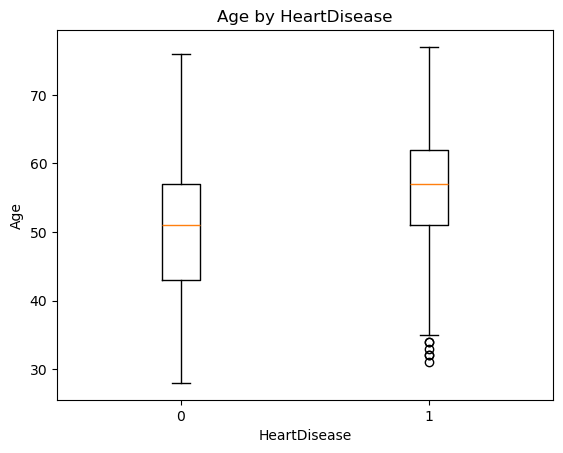

C:\Users\phamd\AppData\Local\Temp\ipykernel_17284\858856629.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["0","1"], showfliers=True)


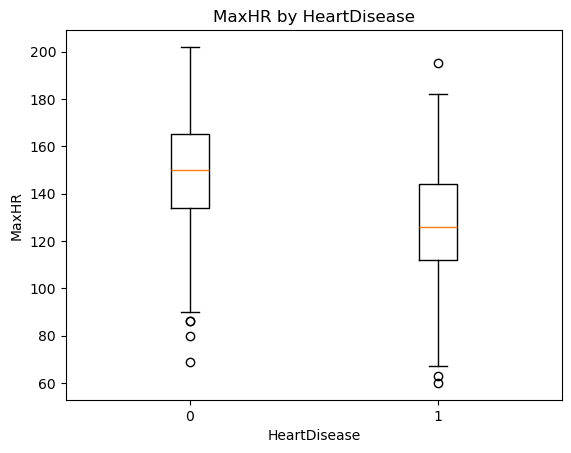

C:\Users\phamd\AppData\Local\Temp\ipykernel_17284\858856629.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["0","1"], showfliers=True)


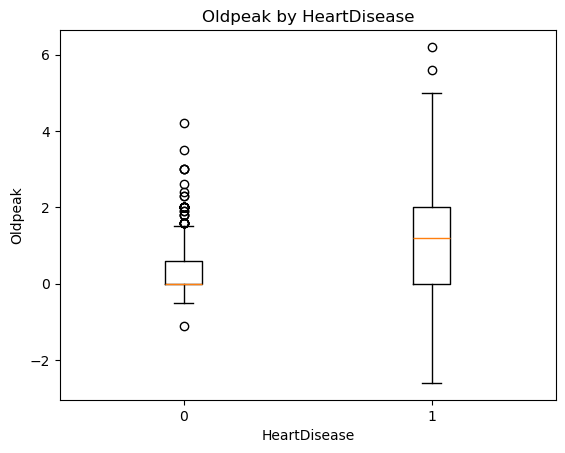

In [14]:
# NOTE: Boxplot: so sánh phân phối theo nhãn HeartDisease (0 vs 1)
def boxplot_by_target(column, target="HeartDisease"):
    data0 = df.loc[df[target] == 0, column].dropna().values
    data1 = df.loc[df[target] == 1, column].dropna().values
    plt.figure()
    plt.boxplot([data0, data1], labels=["0","1"], showfliers=True)
    plt.title(f"{column} by {target}")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

for col in ["Age","MaxHR","Oldpeak"]:
    if col in df.columns:
        boxplot_by_target(col, "HeartDisease")


Age: nhóm có bệnh hơi lớn tuổi hơn.

MaxHR: nhóm có bệnh thường có nhịp tim tối đa thấp hơn.

Oldpeak: nhóm có bệnh có giá trị Oldpeak cao rõ rệt.

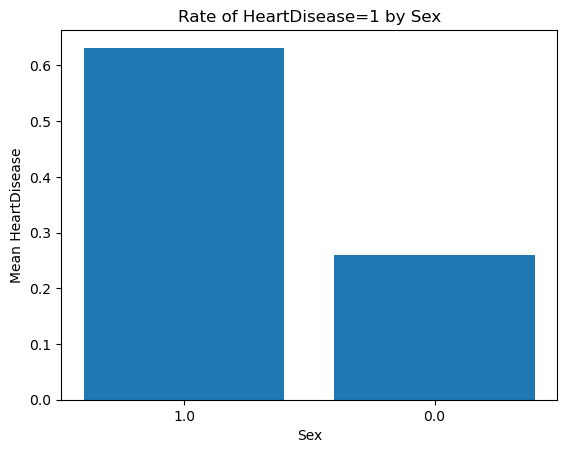

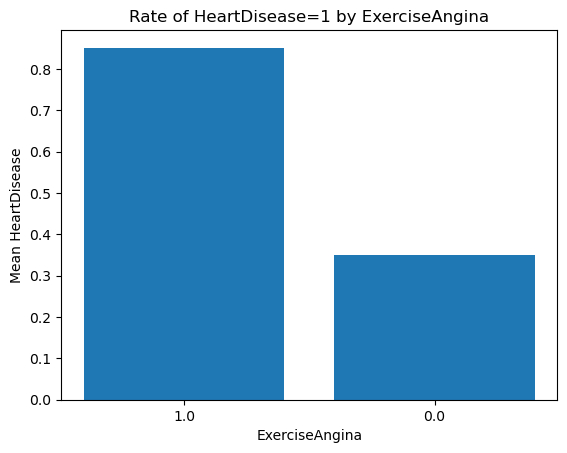

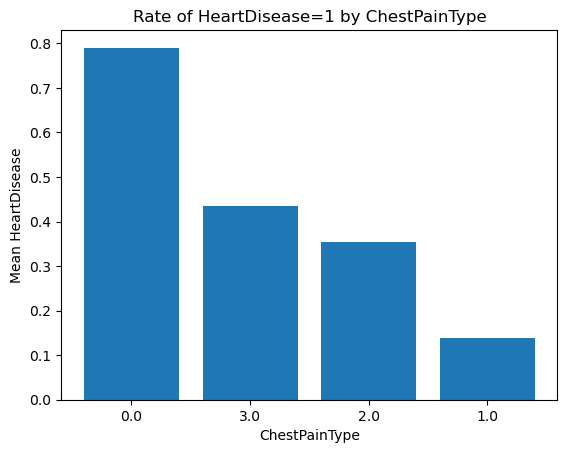

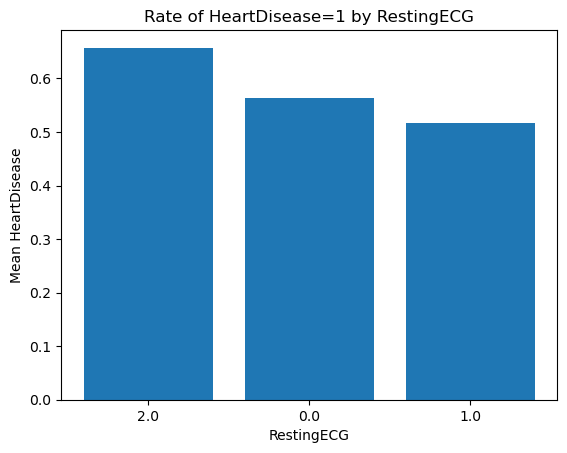

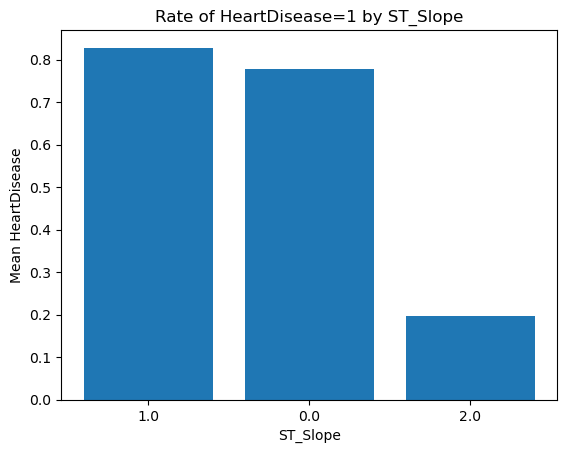

In [15]:
# NOTE: Bar chart: tỉ lệ HeartDisease=1 theo từng nhóm (Sex, ExerciseAngina, ChestPainType, RestingECG, ST_Slope)
def plot_rate_by_category(cat_col, target="HeartDisease"):
    rate = (df.groupby(cat_col)[target].mean()).sort_values(ascending=False)
    plt.figure()
    plt.bar(rate.index.astype(str), rate.values)
    plt.title(f"Rate of {target}=1 by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(f"Mean {target}")
    plt.xticks(rotation=0)
    plt.show()

for cat in ["Sex","ExerciseAngina","ChestPainType","RestingECG","ST_Slope"]:
    if cat in df.columns:
        plot_rate_by_category(cat, "HeartDisease")


Sex: nam có tỷ lệ bệnh cao hơn nữ.

ExerciseAngina: người bị đau thắt ngực khi gắng sức có tỷ lệ bệnh cao.

ChestPainType: nhóm ASY (đau thắt ngực không triệu chứng) có nguy cơ cao nhất.

RestingECG: khác biệt nhỏ, nhưng ST có tỷ lệ cao hơn.

ST_Slope: Flat và Down có tỷ lệ bệnh cao hơn Up.

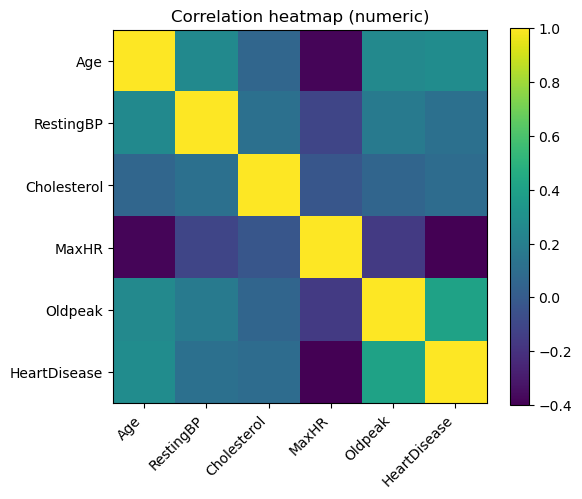

In [16]:
# NOTE: Heatmap ma trận tương quan cho các biến numeric + HeartDisease
cols = [c for c in ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","HeartDisease"] if c in df.columns]
corr = df[cols].corr(numeric_only=True)

plt.figure(figsize=(6,5))
im = plt.imshow(corr, interpolation="nearest")
plt.title("Correlation heatmap (numeric)")
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.colorbar(im)
plt.tight_layout()
plt.show()


Oldpeak có tương quan dương với bệnh tim.

MaxHR tương quan âm (nhịp tim tối đa thấp → nguy cơ cao).

Age và Cholesterol cũng có ảnh hưởng nhưng yếu hơn.

Không có cặp biến numeric nào quá mạnh để lo ngại đa cộng tuyến.

fix github